In [113]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
import requests
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [114]:
df = pd.read_csv('./ph_fires_matched_2.1.csv')

In [115]:
df['total_indoor'] = df[[x for x in df.columns if 'building_fires' in x]].sum(axis=1)
df['sum_unconfined_damage'] = df[[x for x in df.columns if 'inc_type_111' in x or 'prop_loss' in x or 'cont_loss' in x or 'oth_death' in x or 'oth_inj' in x]].sum(axis=1)

In [117]:
# df = df.sort_values('fire_probability', ascending=False)

In [186]:
top = df[df.sum_unconfined_damage > 0]
rest = df[df.sum_unconfined_damage == 0]

In [187]:
# column = 'total_indoor'
# title = 'People Per Unit (Elevator Structures With and Without Unconfined/Damaging FIres)'

# # Compute means
# top_mean = top[column].mean()
# rest_mean = rest[column].mean()

# # Compute weights for normalization
# top_weights = np.ones_like(top[column]) / len(top[column])
# rest_weights = np.ones_like(rest[column]) / len(rest[column])

# bins = np.linspace(0, 4, 16)

# plt.figure(figsize=(18, 9))
# plt.hist(top[column], bins=bins, alpha=0.25, label='>1 Unconfined/Damaging Fire (2012-2021)', color='red', weights=top_weights)
# plt.hist(rest[column], bins=bins, alpha=0.25, label='No Unconfined/Damaging Fire (2012-2021)', color='blue', weights=rest_weights)

# # Add vertical lines for means
# plt.axvline(top_mean, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(rest_mean, color='blue', linestyle='dashed', linewidth=1)
# plt.text(top_mean * 1.06, plt.gca().get_ylim()[1] * 0.9, f'Mean:\n{round(top_mean, 2)}', color='red', ha='center')
# plt.text(rest_mean * 1.06, plt.gca().get_ylim()[1] * 0.8, f'Mean:\n{round(rest_mean, 2)}', color='blue', ha='center')

# plt.title(title, fontsize=16)
# plt.ylabel('Proportion of Total')
# plt.xlabel('People per Unit')
# plt.legend()

# x_ticks = plt.xticks()[0]
# plt.xticks(x_ticks, ['{:.0f}'.format(val) for val in x_ticks])
# plt.xlim(0, 4)

# plt.show()


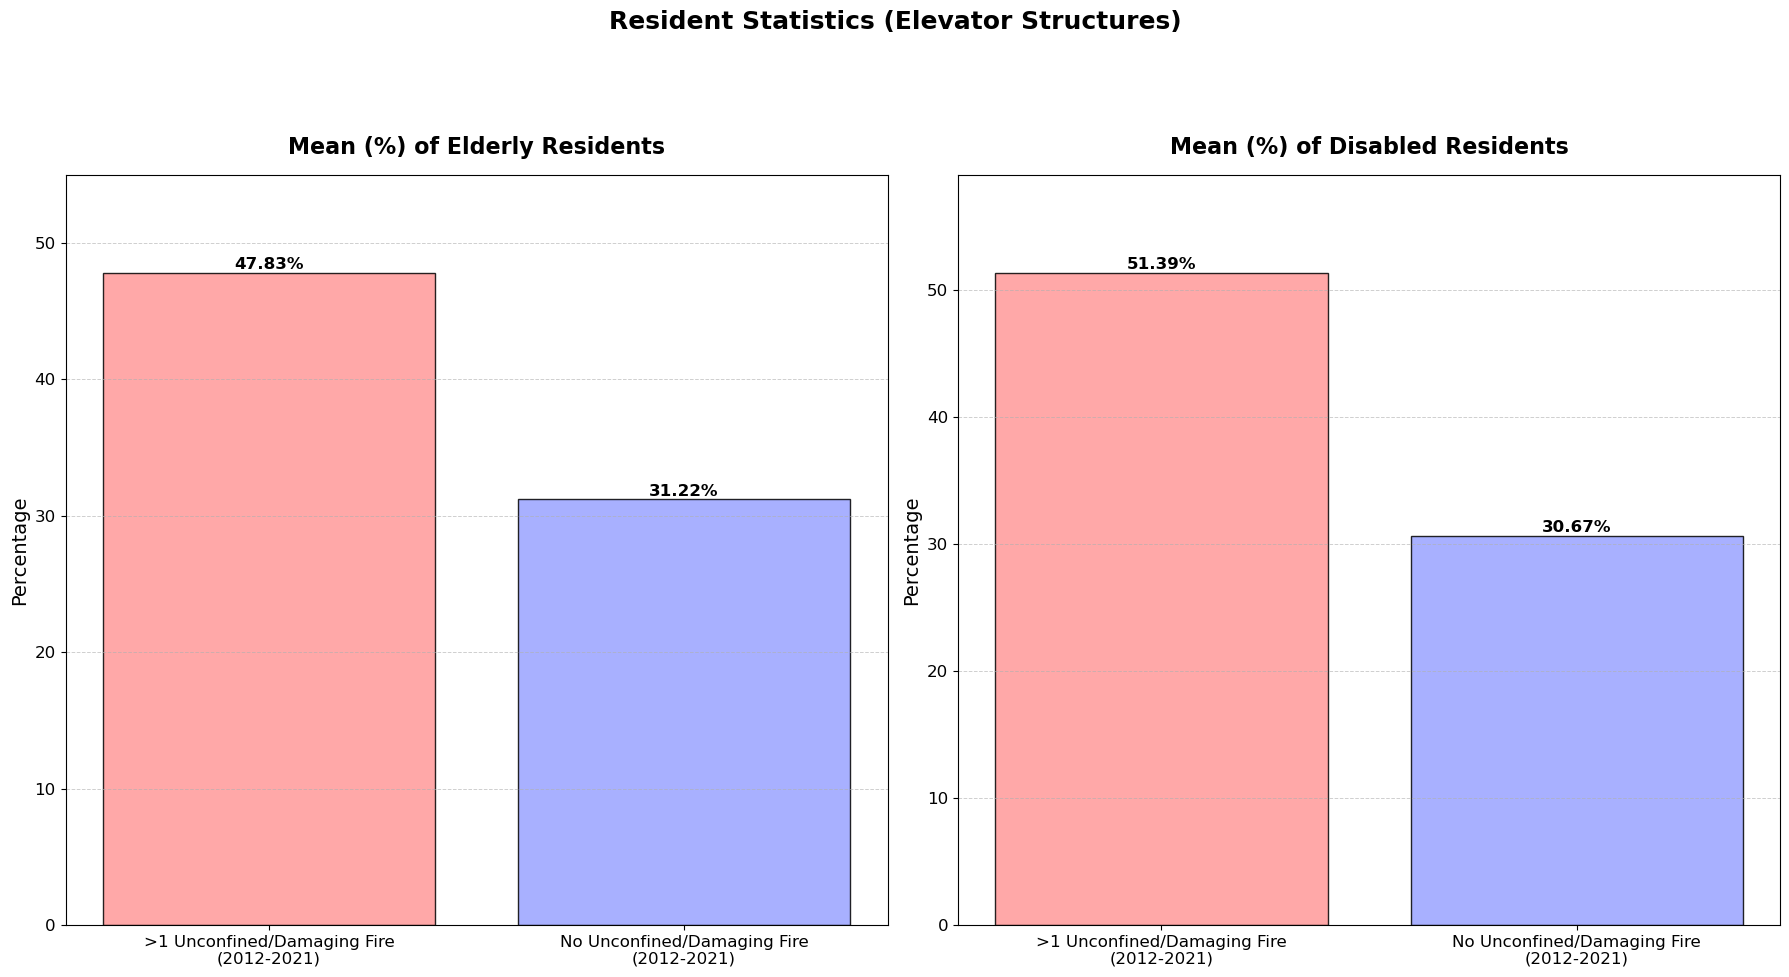

In [188]:
import matplotlib.pyplot as plt

columns = ['eldly_prcnt', 'pct_disabled_all', 'pct_other_major']
titles = [
    'Mean (%) of Elderly Residents',
    'Mean (%) of Disabled Residents',
]

# Define colors for bars
colors = ['#ff9999', '#99a3ff']

# Define labels for bars
labels = ['>1 Unconfined/Damaging Fire\n(2012-2021)', 'No Unconfined/Damaging Fire\n(2012-2021)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
plt.subplots_adjust(wspace=0.3)  # Adjusting the space between plots

for idx, ax in enumerate(axes):

    # Compute means for the specified column
    top_mean = top[columns[idx]].mean()
    rest_mean = rest[columns[idx]].mean()

    # Bar heights
    heights = [top_mean, rest_mean]

    bars = ax.bar(labels, heights, color=colors, alpha=0.85, edgecolor='black')

    # Adding the data value on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 2)}%',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    ax.set_title(titles[idx], fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_ylim(0, max(heights) * 1.15)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)

# Set global figure properties and display the plots
fig.suptitle('Resident Statistics (Elevator Structures)', fontsize=18, y=1.08, fontweight='bold')
plt.tight_layout()
plt.show()


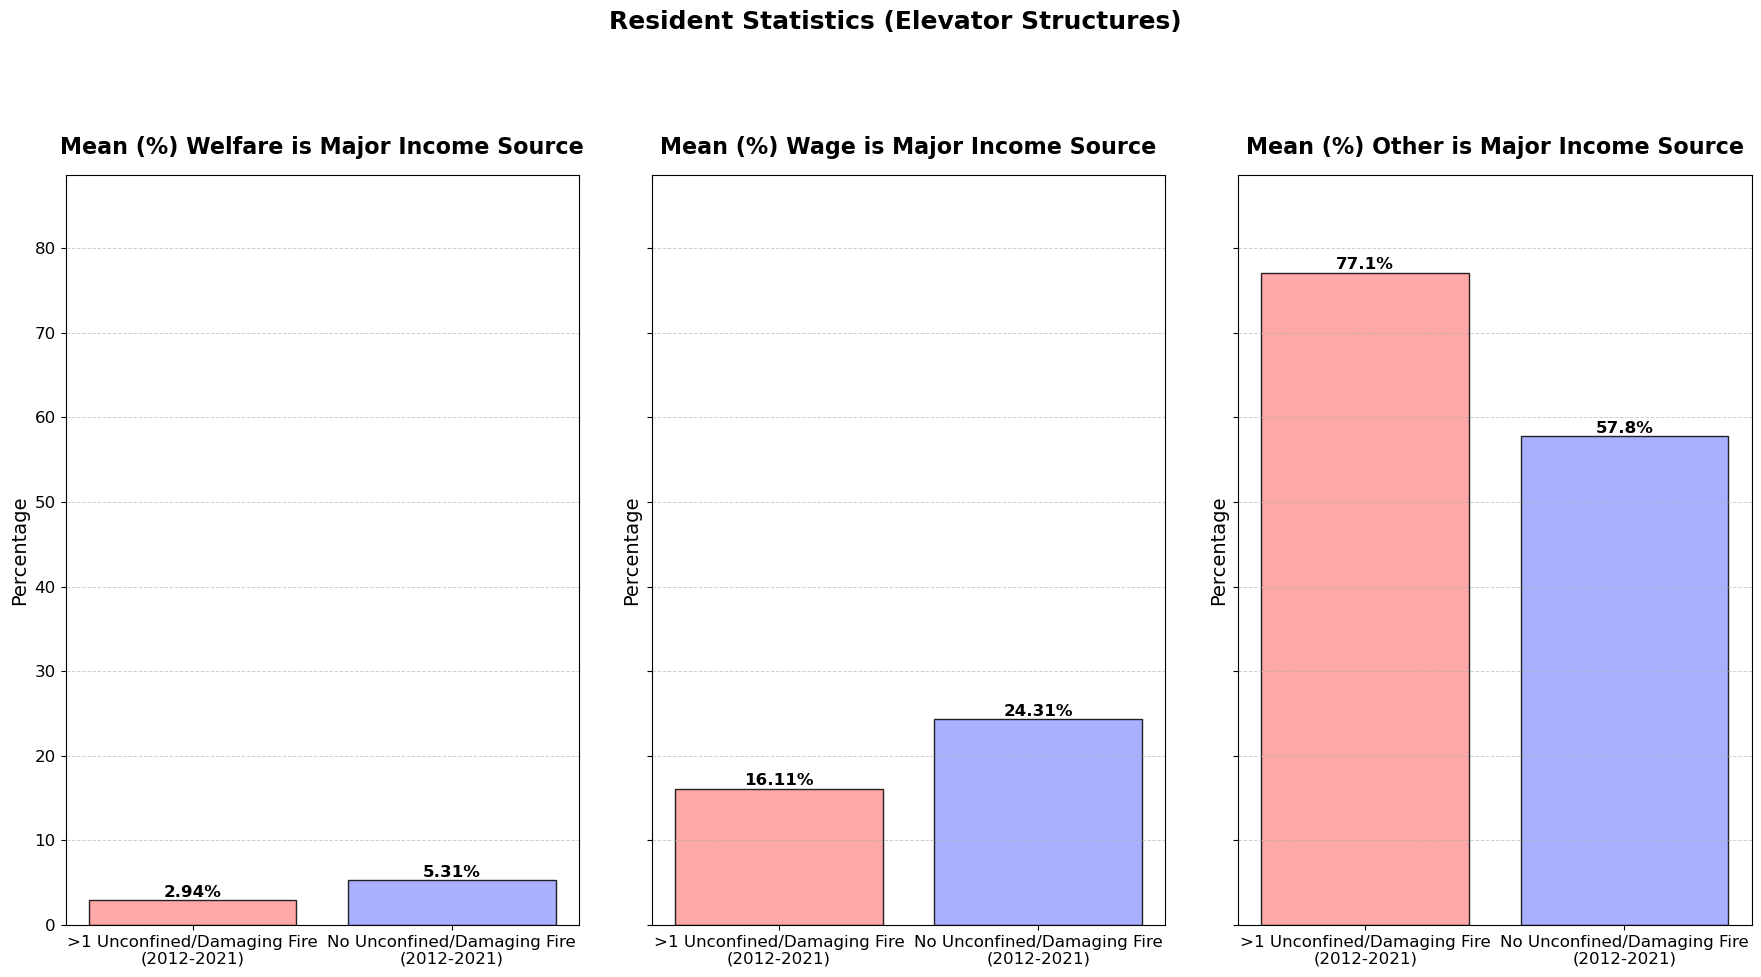

In [189]:
columns = ['pct_welfare_major', 'pct_wage_major', 'pct_other_major']
titles = [
    'Mean (%) Welfare is Major Income Source',
    'Mean (%) Wage is Major Income Source',
    'Mean (%) Other is Major Income Source'
]

# Define colors for bars
colors = ['#ff9999', '#99a3ff']

# Define labels for bars
labels = ['>1 Unconfined/Damaging Fire\n(2012-2021)', 'No Unconfined/Damaging Fire\n(2012-2021)']

fig, axes = plt.subplots(sharey=True, nrows=1, ncols=3, figsize=(18, 9))
plt.subplots_adjust(wspace=0.3)  # Adjusting the space between plots

for idx, ax in enumerate(axes):

    # Compute means for the specified column
    top_mean = top[columns[idx]].mean()
    rest_mean = rest[columns[idx]].mean()

    # Bar heights
    heights = [top_mean, rest_mean]

    bars = ax.bar(labels, heights, color=colors, alpha=0.85, edgecolor='black')

    # Adding the data value on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 2)}%',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    ax.set_title(titles[idx], fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_ylim(0, max(heights) * 1.15)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)

# Set global figure properties and display the plots
fig.suptitle('Resident Statistics (Elevator Structures)', fontsize=18, y=1.08, fontweight='bold')
plt.tight_layout()
plt.show()


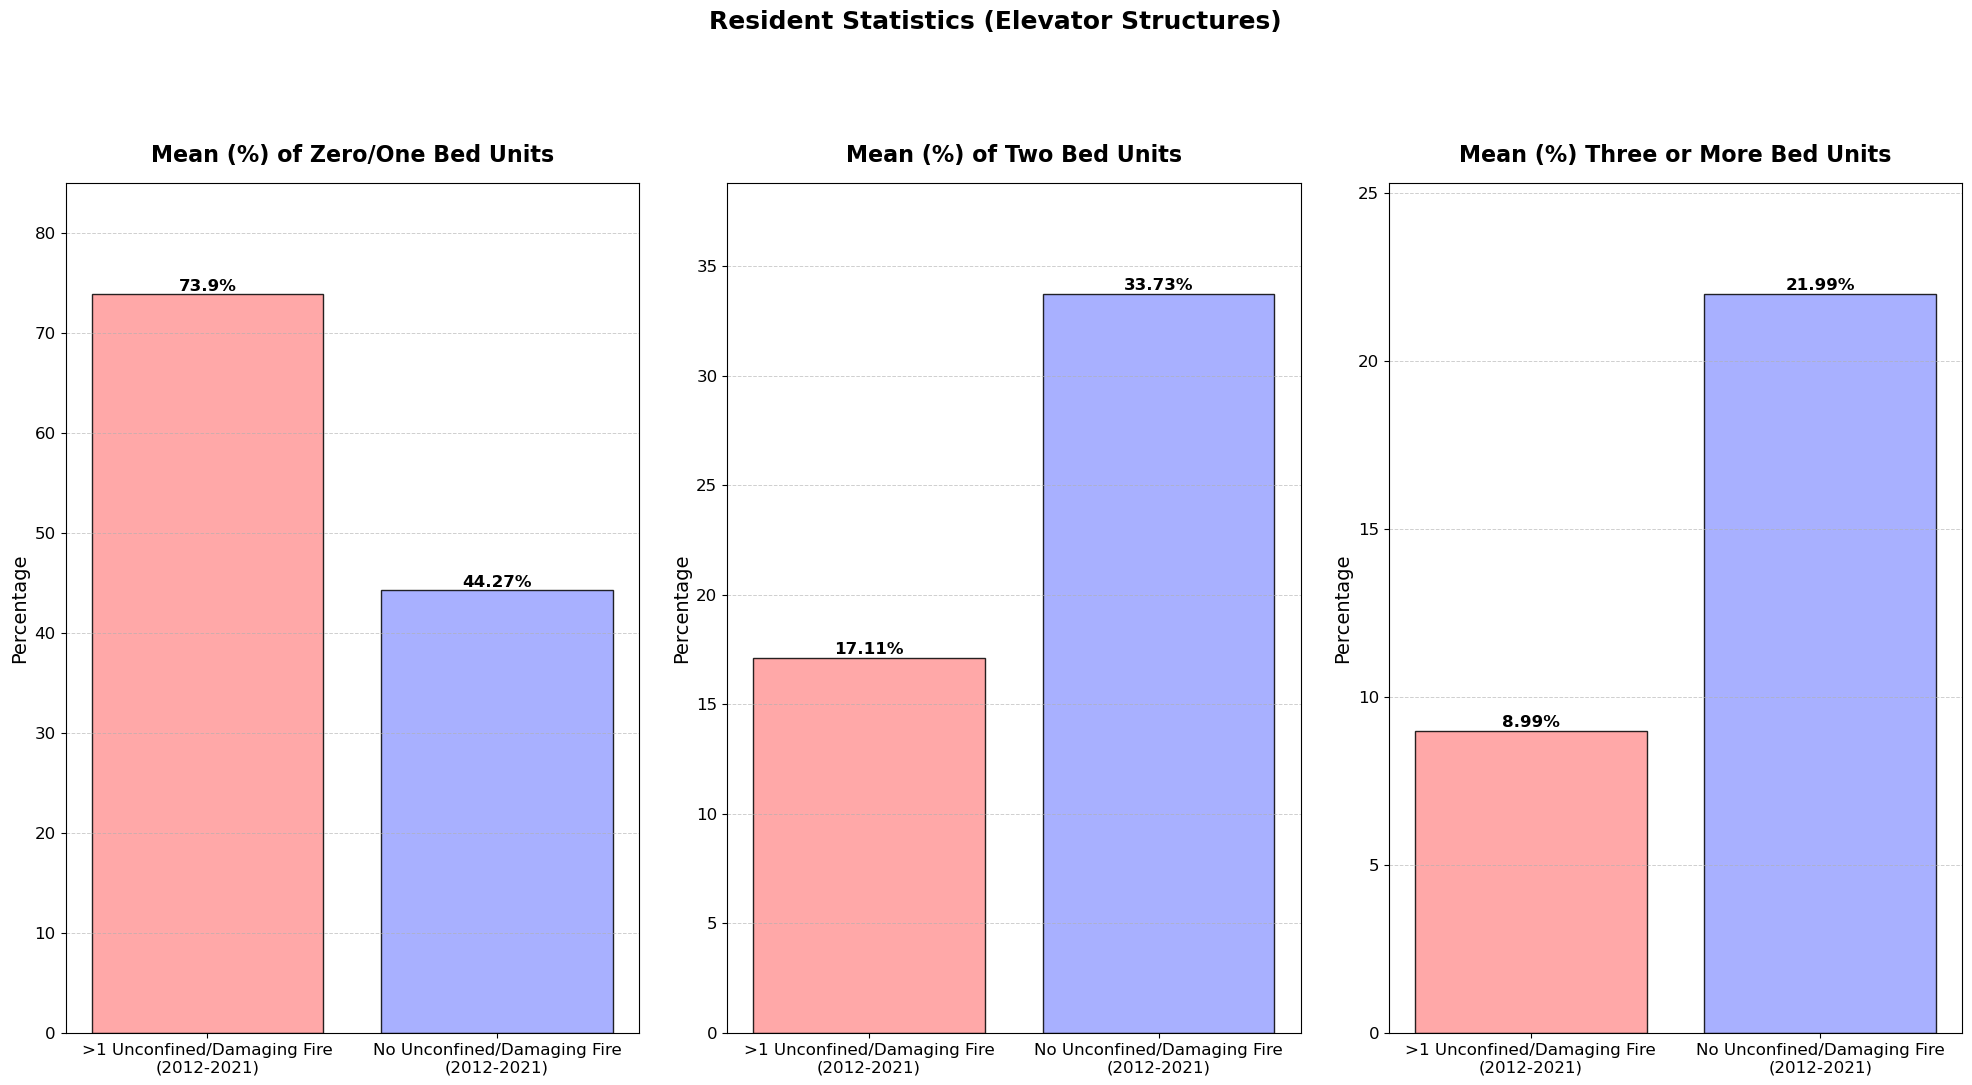

In [195]:
columns = ['pct_bed1', 'pct_bed2', 'pct_bed3']
titles = [
    'Mean (%) of Zero/One Bed Units',
    'Mean (%) of Two Bed Units',
    'Mean (%) Three or More Bed Units'
]

# Define colors for bars
colors = ['#ff9999', '#99a3ff']

# Define labels for bars
labels = ['>1 Unconfined/Damaging Fire\n(2012-2021)', 'No Unconfined/Damaging Fire\n(2012-2021)']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)  # Adjusting the space between plots

for idx, ax in enumerate(axes):

    # Compute means for the specified column
    top_mean = top[columns[idx]].mean()
    rest_mean = rest[columns[idx]].mean()

    # Bar heights
    heights = [top_mean, rest_mean]

    bars = ax.bar(labels, heights, color=colors, alpha=0.85, edgecolor='black')

    # Adding the data value on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 2)}%',
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

    ax.set_title(titles[idx], fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_ylim(0, max(heights) * 1.15)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)

# Set global figure properties and display the plots
fig.suptitle('Resident Statistics (Elevator Structures)', fontsize=18, y=1.08, fontweight='bold')
plt.tight_layout()
plt.show()


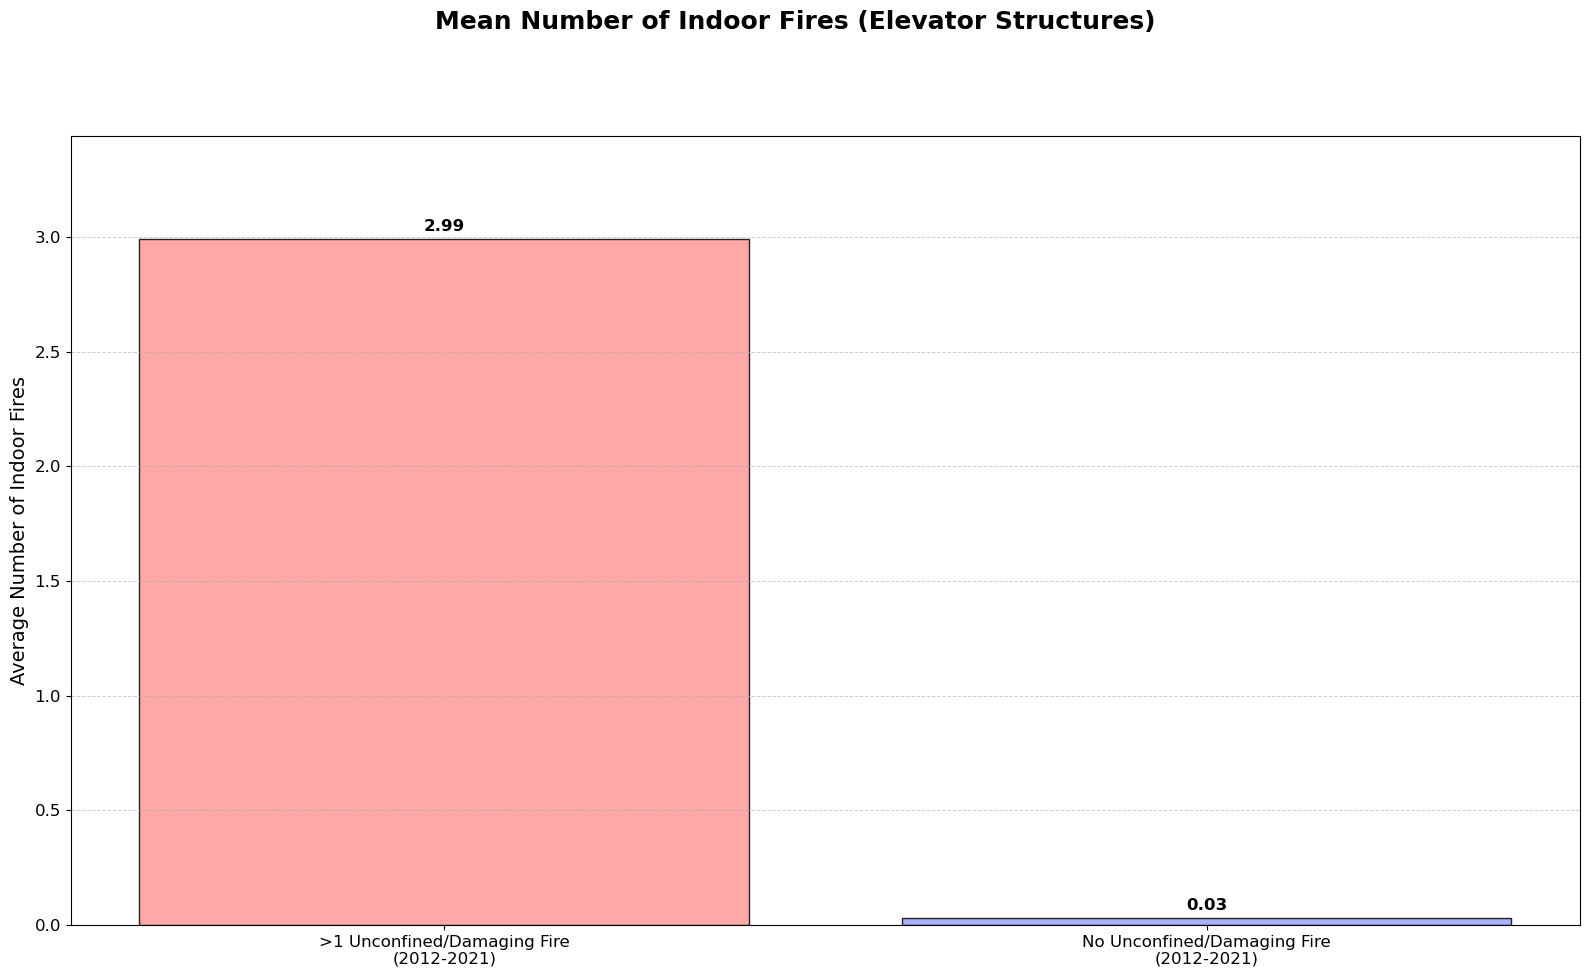

In [191]:
columns = ['total_indoor',]
titles = [
    'Mean Indoor Fires (2012-2021)',
]

# Define colors for bars
colors = ['#ff9999', '#99a3ff']

# Define labels for bars
labels = ['>1 Unconfined/Damaging Fire\n(2012-2021)', 'No Unconfined/Damaging Fire\n(2012-2021)']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
plt.subplots_adjust(wspace=0.3)  # Adjusting the space between plots


idx = 0
ax = axes
# Compute means for the specified column
top_mean = top[columns[idx]].mean()
rest_mean = rest[columns[idx]].mean()

# Bar heights
heights = [top_mean, rest_mean]

bars = ax.bar(labels, heights, color=colors, alpha=0.85, edgecolor='black')

# Adding the data value on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 2)}',
            ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# ax.set_title(titles[idx], fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Average Number of Indoor Fires', fontsize=14)
ax.set_ylim(0, max(heights) * 1.15)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

ax.tick_params(axis='both', which='major', labelsize=12)

# Set global figure properties and display the plots
fig.suptitle('Mean Number of Indoor Fires (Elevator Structures)', fontsize=18, y=1.08, fontweight='bold')
plt.tight_layout()
plt.show()


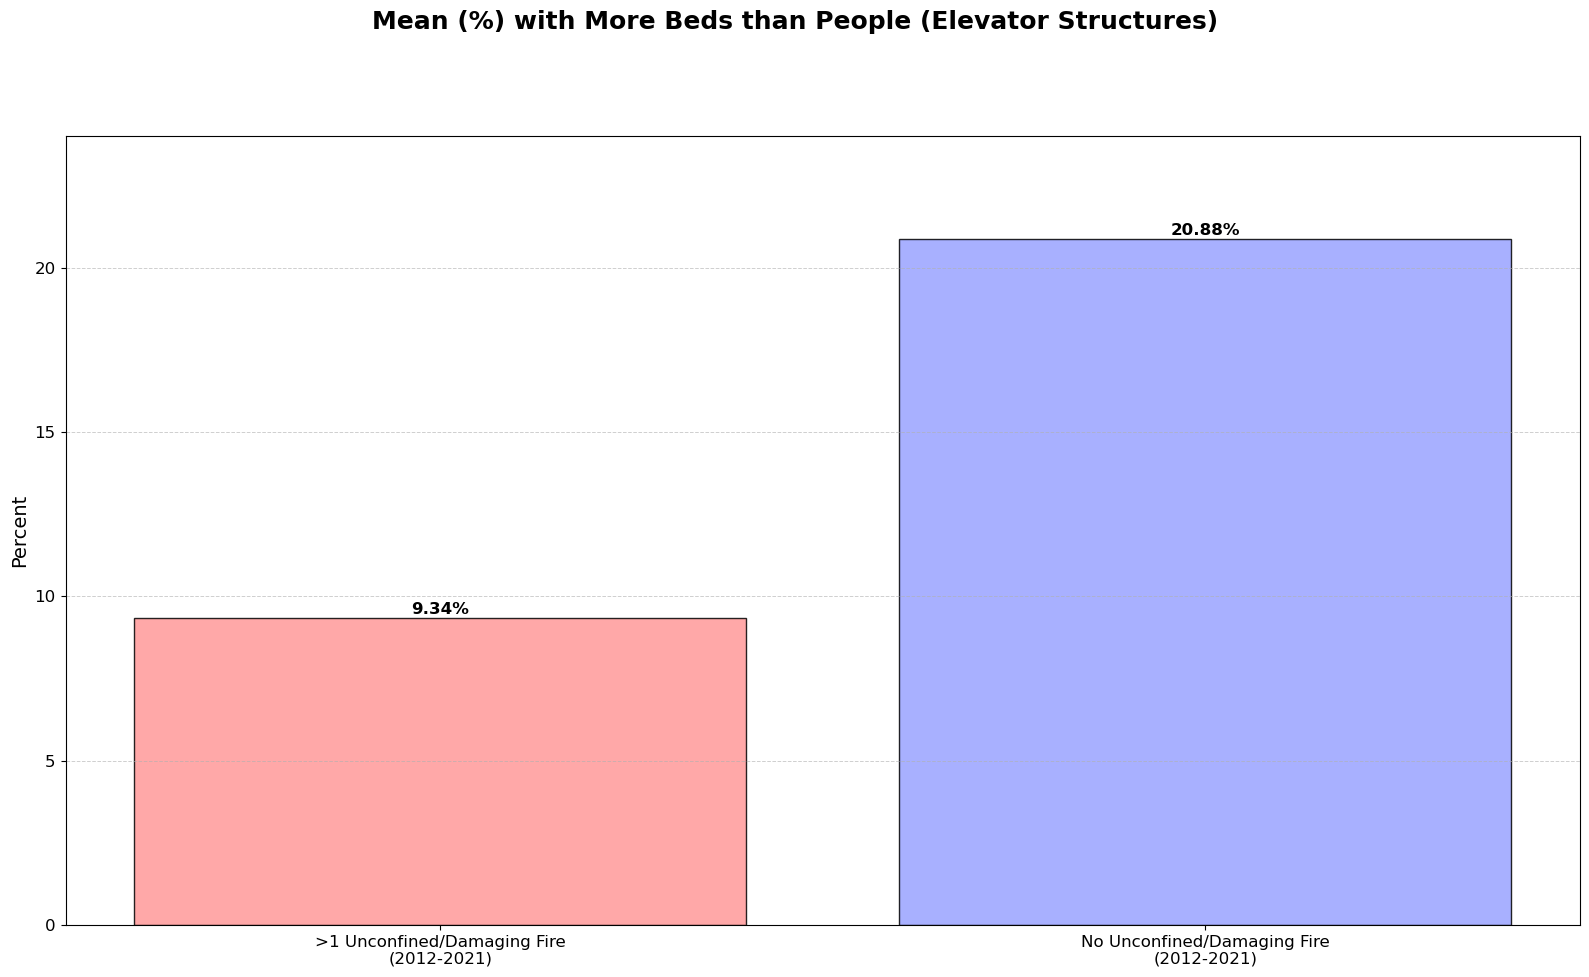

In [199]:
columns = ['pct_overhoused',]
titles = [
    'Mean (%) with More Beds than People',
]

# Define colors for bars
colors = ['#ff9999', '#99a3ff']

# Define labels for bars
labels = ['>1 Unconfined/Damaging Fire\n(2012-2021)', 'No Unconfined/Damaging Fire\n(2012-2021)']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
plt.subplots_adjust(wspace=0.3)  # Adjusting the space between plots


idx = 0
ax = axes
# Compute means for the specified column
top_mean = top[columns[idx]].mean()
rest_mean = rest[columns[idx]].mean()

# Bar heights
heights = [top_mean, rest_mean]

bars = ax.bar(labels, heights, color=colors, alpha=0.85, edgecolor='black')

# Adding the data value on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{round(yval, 2)}%',
            ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# ax.set_title(titles[idx], fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Percent', fontsize=14)
ax.set_ylim(0, max(heights) * 1.15)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

ax.tick_params(axis='both', which='major', labelsize=12)

# Set global figure properties and display the plots
fig.suptitle('Mean (%) with More Beds than People (Elevator Structures)', fontsize=18, y=1.08, fontweight='bold')
plt.tight_layout()
plt.show()


In [200]:
probs = pd.read_csv('./lr_es_type1_probs_8_11_23-2.csv')

In [201]:
probs = probs.sort_values('fire_probability', ascending=False)

In [213]:
probs.shape[0]

4021

In [220]:
probs[probs.building_fires_2021 > 0].shape[0]

411

In [243]:
top = probs.head(300)

In [244]:
top[top.building_fires_2021 > 0].shape[0]

111